In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname="C:\\Windows\\Fonts\\malgun.ttf").get_name()
plt.rc("font", family=font_name)

import matplotlib as mlp
mlp.rcParams["axes.unicode_minus"] = False
from PIL import Image

In [2]:
import mglearn

from sklearn.linear_model import LinearRegression

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


from sklearn.datasets import load_iris
from sklearn.datasets import load_boston

In [3]:
import warnings
warnings.filterwarnings("ignore")
# warnings.filterwarnings("default") # 경고문 다시 뜨도록

- https://learnerjoy.com/ridge-regression-lasso-regression-elastic-net-regression/

# 1. 주말

- 일반 선형회귀 모델
- 릿지 선형회귀 모델
- 라쏘 선형회귀 모델
- 엘라스틱넷 선형회귀 모델

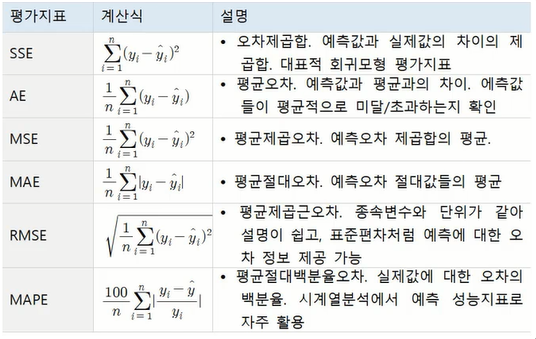

In [4]:
image = Image.open('C:/kimhotak13/PythonWork/AI/data/msemae.png')
image

- MAE보다 MSE를 쓰는 이유 : 미분을 쓰기 편하다

In [18]:
boston = load_boston()
boston.data

X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, random_state=0)

boston.data.shape

(506, 13)

In [19]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [20]:
print("훈련 점수 : ", model.score(X_train, y_train))
print("테스트 점수 : ", model.score(X_test, y_test))

훈련 점수 :  0.7697699488741149
테스트 점수 :  0.6354638433202129


# 2. 고차원 특성에 대한 과적합 

In [10]:
from mglearn.datasets import load_extended_boston

In [11]:
X, y = load_extended_boston()
print(X.shape)

(506, 104)


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [13]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [14]:
print("훈련 점수 : ", model.score(X_train, y_train))
print("테스트 점수 : ", model.score(X_test, y_test))

훈련 점수 :  0.9520519609032729
테스트 점수 :  0.6074721959665788


- 설명력은 올랐으나 테스트 점수가 떨어져서 과적합은 더 벌어졌다
- 설명력을 높이기 위해 변수를 많이 모으는 것은 항상 올바른 결과를 가져다주지는 않는다
- 과적합을 해결하기 위해, 일반선형회귀모델에는 하이퍼 파라미터와 같은 것이 없는가?
- 아무런 파라미터가 없기에 조절할 여지가 없다.
- 일반선형모델 : 튜닝할 수가 없다.

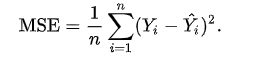

In [35]:
image = Image.open('C:/kimhotak13/PythonWork/AI/data/mse.png')
image

## (1) Ridge Linear Regression

- L2 규제(Regularization)
    - MSE항에 Penalty항을 추가
- 알파를 크게하면 페널티의 효과가 커지고(가중치 감소, 모델이 단순), 작게하면 그 반대가 된다.
- 모델을 단순하게 해주고 훈련셋에 대한 성능 차이를 절충해주는 효과
- 규제를 사용하면 다중 공선성 문제를 방지하기 때문에 모델의 과대적합을 막을 수 있다.
- 훈련성능을 올리는 것은 아니다.

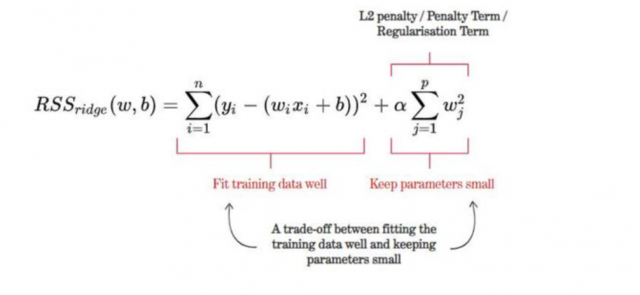

In [8]:
image = Image.open('C:/kimhotak13/PythonWork/AI/data/ridge.png')
image

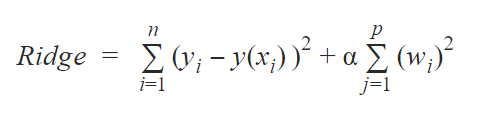

In [9]:
image = Image.open('C:/kimhotak13/PythonWork/AI/data/ridge2.png')
image

In [15]:
from sklearn.linear_model import Ridge

In [16]:
ridge = Ridge(alpha=1.0).fit(X_train, y_train)

In [18]:
print("훈련 점수 : ", ridge.score(X_train, y_train))
print("테스트 점수 : ", ridge.score(X_test, y_test))

훈련 점수 :  0.885796658517094
테스트 점수 :  0.7527683481744752


In [19]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)

In [20]:
print("훈련 점수 : ", ridge10.score(X_train, y_train))
print("테스트 점수 : ", ridge10.score(X_test, y_test))

훈련 점수 :  0.7882787115369616
테스트 점수 :  0.6359411489177311


In [21]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)

In [22]:
print("훈련 점수 : ", ridge01.score(X_train, y_train))
print("테스트 점수 : ", ridge01.score(X_test, y_test))

훈련 점수 :  0.9282273685001985
테스트 점수 :  0.7722067936479811


(-15.0, 25.0)

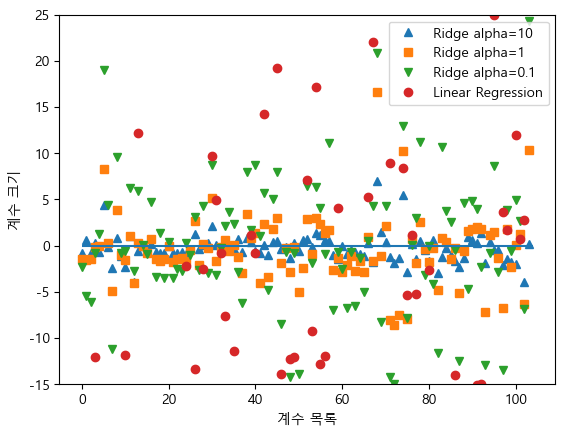

In [28]:
plt.plot(ridge10.coef_, "^", label="Ridge alpha=10")
plt.plot(ridge.coef_, "s", label="Ridge alpha=1")
plt.plot(ridge01.coef_, "v", label="Ridge alpha=0.1")

plt.plot(model.coef_, "o", label="Linear Regression")



plt.legend()
plt.xlabel("계수 목록")
plt.ylabel("계수 크기")
plt.hlines(0, 0, len(model.coef_))
plt.ylim(-15, 25)

- 규제를 하면 할수록 중간으로 모인다
- 규제가 작을수록 일반 선형회귀와 비슷한 경향을 나타낸다

## (2) Lasso Linear Regression

- L1 규제
- 특성 선택이 자동으로 이루어진다.
- 특성 선택이 자동 = 변수를 제거하면서 진행한다 = 그러면서 특성을 맞춘다
- 알파를 크게 하면 페널티의 효과가 커지고(가중치 감소, 모델이 단순), 작게하면 그 반대가 된다.
- 라쏘와 릿지 2가지를 다 쓸 거라면, 라쏘를 먼저 쓰고 릿지를 쓰면 안된다.
- 무조건 릿지 먼저 사용해야한다.

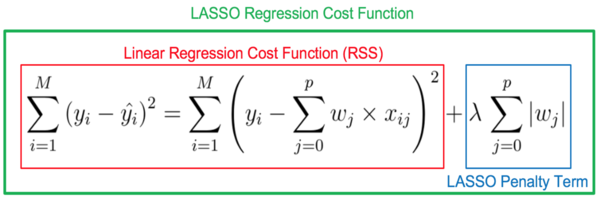

In [29]:
image = Image.open('C:/kimhotak13/PythonWork/AI/data/lasso.png')
image

In [30]:
from sklearn.linear_model import Lasso

In [31]:
lasso = Lasso(alpha=1.0).fit(X_train, y_train)
print("훈련 점수 : ", lasso.score(X_train, y_train))
print("테스트 점수 : ", lasso.score(X_test, y_test))
print("사용한 특성의 수 :", np.sum(lasso.coef_ !=0))

훈련 점수 :  0.29323768991114607
테스트 점수 :  0.20937503255272294
사용한 특성의 수 : 4


In [32]:
lasso001 = Lasso(alpha=0.01).fit(X_train, y_train)
print("훈련 점수 : ", lasso001.score(X_train, y_train))
print("테스트 점수 : ", lasso001.score(X_test, y_test))
print("사용한 특성의 수 :", np.sum(lasso.coef_ !=0))

훈련 점수 :  0.8961122320864717
테스트 점수 :  0.7677995670886713
사용한 특성의 수 : 4


In [33]:
lasso00001 = Lasso(alpha=0.0001).fit(X_train, y_train)
print("훈련 점수 : ", lasso00001.score(X_train, y_train))
print("테스트 점수 : ", lasso00001.score(X_test, y_test))
print("사용한 특성의 수 :", np.sum(lasso.coef_ !=0))

훈련 점수 :  0.9420931515237063
테스트 점수 :  0.6976541391663642
사용한 특성의 수 : 4


(-15.0, 25.0)

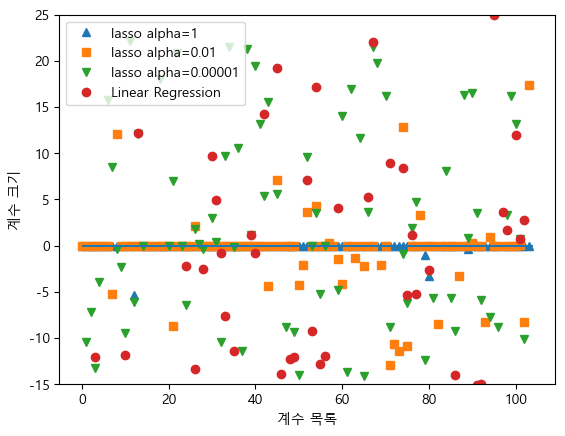

In [34]:
plt.plot(lasso.coef_, "^", label="lasso alpha=1")
plt.plot(lasso001.coef_, "s", label="lasso alpha=0.01")
plt.plot(lasso00001.coef_, "v", label="lasso alpha=0.00001")

plt.plot(model.coef_, "o", label="Linear Regression")



plt.legend()
plt.xlabel("계수 목록")
plt.ylabel("계수 크기")
plt.hlines(0, 0, len(model.coef_))
plt.ylim(-15, 25)

- 계수를 낮출수록 분산된다

## (3) ElasticNet Linear Regression(신축망)

- 릿지회귀와 라쏘회귀, 두 모델의 모든 규제를 사용하는 선형 모델
- 두 모델의 장점을 모두 갖고 있기 때문에 좋은 성능을 보임
- 데이터 특성이 많거나 서로 상관 관계가 높은 특성이 존재할 때 위의 두 모델보다 좋은 성능을 보여준다

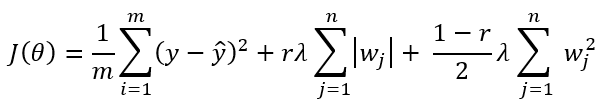

In [35]:
image = Image.open('C:/kimhotak13/PythonWork/AI/data/elasticnet.png')
image

In [36]:
from sklearn.linear_model import ElasticNet

In [37]:
elastic = ElasticNet().fit(X_train, y_train) # alpha = 1., l1_ratio=0.5

print("훈련 점수 : ", elastic.score(X_train, y_train))
print("테스트 점수 : ", elastic.score(X_test, y_test))
print("사용한 특성의 수 :", np.sum(elastic.coef_ !=0))

훈련 점수 :  0.32837814485847916
테스트 점수 :  0.2217004367773664
사용한 특성의 수 : 38


In [38]:
elastic001 = ElasticNet(alpha=0.01).fit(X_train, y_train) 

print("훈련 점수 : ", elastic001.score(X_train, y_train))
print("테스트 점수 : ", elastic001.score(X_test, y_test))
print("사용한 특성의 수 :", np.sum(elastic001.coef_ !=0))

훈련 점수 :  0.8553665697077995
테스트 점수 :  0.7209054027265391
사용한 특성의 수 : 84


In [39]:
elastic00001 = ElasticNet(alpha=0.0001).fit(X_train, y_train) 

print("훈련 점수 : ", elastic00001.score(X_train, y_train))
print("테스트 점수 : ", elastic00001.score(X_test, y_test))
print("사용한 특성의 수 :", np.sum(elastic00001.coef_ !=0))

훈련 점수 :  0.9374103160789478
테스트 점수 :  0.7318843811977773
사용한 특성의 수 : 103


(-15.0, 25.0)

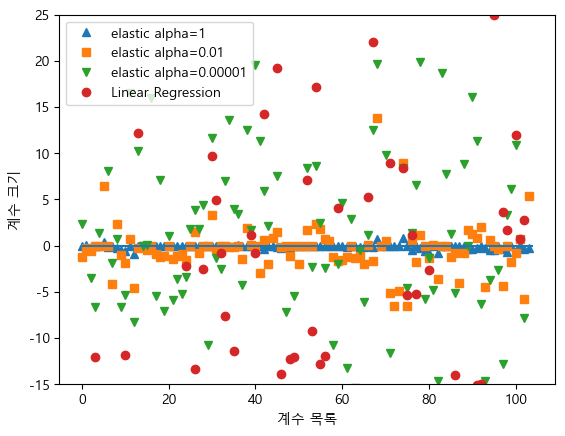

In [40]:
plt.plot(elastic.coef_, "^", label="elastic alpha=1")
plt.plot(elastic001.coef_, "s", label="elastic alpha=0.01")
plt.plot(elastic00001.coef_, "v", label="elastic alpha=0.00001")

plt.plot(model.coef_, "o", label="Linear Regression")



plt.legend()
plt.xlabel("계수 목록")
plt.ylabel("계수 크기")
plt.hlines(0, 0, len(model.coef_))
plt.ylim(-15, 25)

- 규제가 약해질수록 훈련값이 좋아지고 있다(알파값을 낮출수록)
- 규제가 약해질수록 분산되고 있다

## (4) 알파값을 1로 고정한 상태에서 데이터의 크기 조절

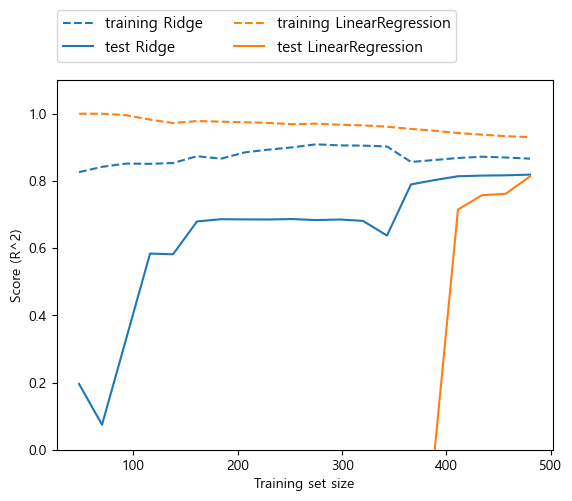

In [42]:
mglearn.plots.plot_ridge_n_samples()

- Linear는 size가 적으면 아예 학습자체가 되지 않는다(데이터 수에 매우 민감하다)
- Ridge는 size가 적더라도 어느정도 테스트가 진행가능하고 많아질수록 올라간다(데이터 수에 민감하지 않다)
- Size(데이터 수)가 많아지면 성능이 비슷해진다. (데이터 수가 중요하다)
- 제일 좋은 튜닝은 데이터수를 많이 확보하는 것이다

# 3. 캘리포니아 주택 가격

In [276]:
from sklearn.datasets import fetch_california_housing

In [476]:
california = fetch_california_housing()
print(california.keys())
print(california.DESCR)

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])
.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
ex

In [477]:
california

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [478]:
california_df = pd.DataFrame(california.data, columns=california.feature_names)

california_df["Target"] = california.target
california_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [479]:
california_df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


<AxesSubplot:xlabel='Longitude', ylabel='Latitude'>

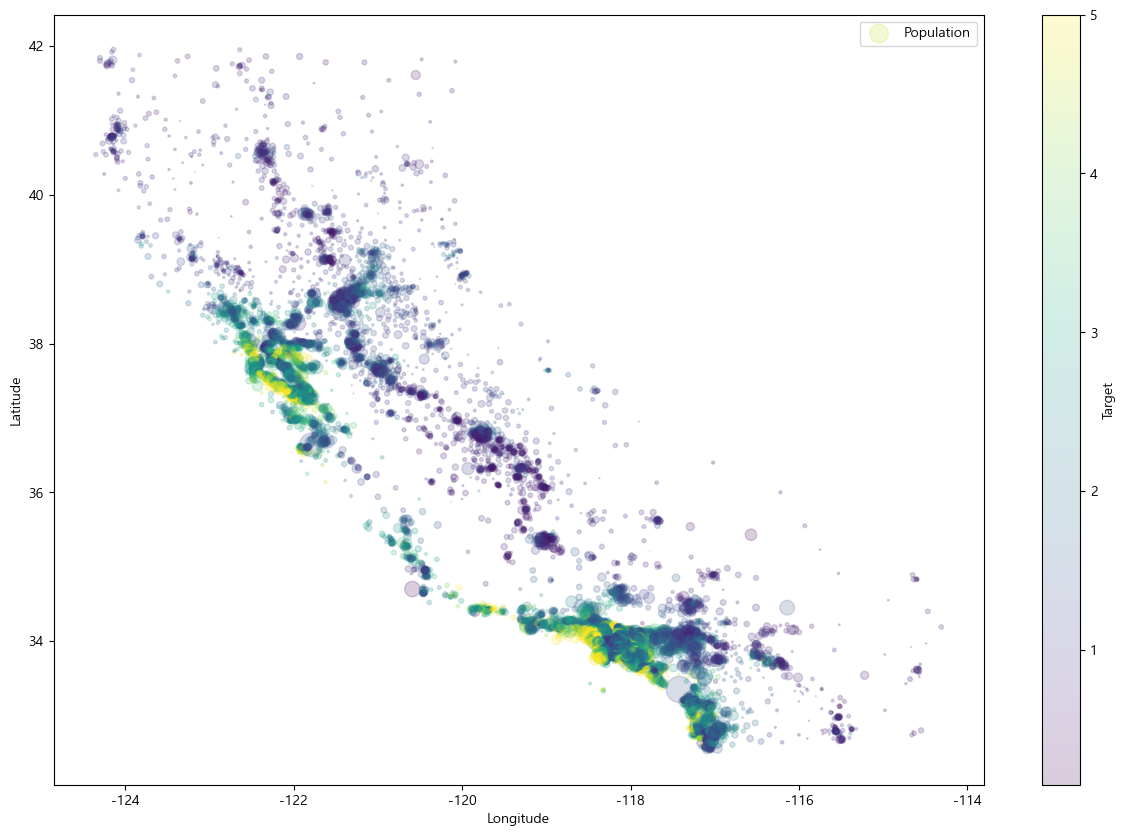

In [480]:
california_df.plot(kind="scatter", x="Longitude", y="Latitude", alpha = .2, c = "Target", cmap = plt.get_cmap("viridis"),
                  figsize=(15, 10), s = california_df["Population"]/100, label="Population")

## (2) 선형 회귀

In [481]:
X_train, X_test, y_train, y_test = train_test_split(california.data, california.target, random_state=42)

In [482]:
model = LinearRegression()
model.fit(X_train, y_train)
print("훈련 점수 : ", model.score(X_train, y_train))
print("테스트 점수 : ", model.score(X_test, y_test))

훈련 점수 :  0.6098730310529251
테스트 점수 :  0.5910509795491355


In [483]:
ridge = Ridge(alpha=1.0).fit(X_train, y_train)
print("훈련 점수 : ", ridge.score(X_train, y_train))
print("테스트 점수 : ", ridge.score(X_test, y_test))

훈련 점수 :  0.6098729526143938
테스트 점수 :  0.5911128551684501


In [484]:
lasso = Lasso(alpha=1.0).fit(X_train, y_train)
print("훈련 점수 : ", lasso.score(X_train, y_train))
print("테스트 점수 : ", lasso.score(X_test, y_test))
print("사용한 특성의 수 :", np.sum(lasso.coef_ !=0))

훈련 점수 :  0.2867363771486492
테스트 점수 :  0.2854847529538541
사용한 특성의 수 : 3


In [485]:
scores = cross_val_score(model, california.data, california.target, cv=10, scoring="neg_mean_squared_error")

In [486]:
print(scores)
print(scores.mean())

[-0.48922052 -0.43335865 -0.8864377  -0.39091641 -0.7479731  -0.52980278
 -0.28798456 -0.77326441 -0.64305557 -0.3275106 ]
-0.5509524296956645


In [487]:
r2_scores = cross_val_score(model, california.data, california.target, cv=10, scoring="r2")

In [488]:
print(r2_scores)
print(r2_scores.mean())

[0.48254494 0.61416063 0.42274892 0.48178521 0.55705986 0.5412919
 0.47496038 0.45844938 0.48177943 0.59528796]
0.5110068610523766


In [489]:
from sklearn.metrics import mean_squared_error, r2_score

In [490]:
y_train_predict = model.predict(X_train)

mse = mean_squared_error(y_train, y_train_predict)
# mean_squared_error(정답, 예측값)
# LOSS = COST # 딥러닝에서는 COST라고 자주 사용된다
rmse = np.sqrt(mean_squared_error(y_train, y_train_predict)) # mse에 루트를 씌워준 것
r2 = r2_score(y_train, y_train_predict)

print("RMSE :", rmse)
print("R2 :", r2)

RMSE : 0.7214930466501481
R2 : 0.6098730310529251


In [491]:
print(y_train_predict[:10])
print(y_train[:10])

[2.35870897 3.14117532 2.2227708  3.17998867 0.85244297 2.10097132
 2.32663483 0.61851715 4.1970875  1.30793711]
[2.285   2.799   1.83    4.658   1.5     2.509   5.00001 1.208   5.00001
 0.993  ]


In [492]:
y_test_predict = model.predict(X_test)

mse = mean_squared_error(y_test, y_test_predict)
# mean_squared_error(정답, 예측값)
# LOSS = COST # 딥러닝에서는 COST라고 자주 사용된다
rmse = np.sqrt(mean_squared_error(y_test, y_test_predict)) # mse에 루트를 씌워준 것
r2 = r2_score(y_test, y_test_predict)

print("RMSE :", rmse)
print("R2 :", r2)

RMSE : 0.7356145375446765
R2 : 0.5910509795491355


### (3) 통계적 분석

In [493]:
import statsmodels.formula.api as sm

In [494]:
#sm.ols() #최소제곱법
result = sm.ols(formula="Target ~ MedInc + HouseAge + AveRooms + AveBedrms + Population + AveOccup + Latitude + Longitude", data = california_df).fit()

In [495]:
california_df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'Target'],
      dtype='object')

In [496]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                 Target   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.606
Method:                 Least Squares   F-statistic:                     3970.
Date:                Tue, 09 May 2023   Prob (F-statistic):               0.00
Time:                        18:05:58   Log-Likelihood:                -22624.
No. Observations:               20640   AIC:                         4.527e+04
Df Residuals:                   20631   BIC:                         4.534e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -36.9419      0.659    -56.067      0.0

-  R-squared:0.606 / Adj. R-squared:0.606 가 같은것은 매우 바람직한 현상
-  Population을 제외하고는 영향이 있다(P>|t| 근거)

## (4) Tuning

### 1) Ridge

In [497]:
param_grid = {"alpha" : [1e-5, 1e-4, 1e-3, 1e-2, 0.1, 0.5, 5.0, 10.0]}

ridge_grid = GridSearchCV(Ridge(), param_grid, cv=10)
ridge_grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.01, 0.1, 0.5, 5.0,
                                   10.0]})

In [498]:
y_train_predict = ridge.predict(X_train)

mse = mean_squared_error(y_train, y_train_predict)
# mean_squared_error(정답, 예측값)
# LOSS = COST # 딥러닝에서는 COST라고 자주 사용된다
rmse = np.sqrt(mean_squared_error(y_train, y_train_predict)) # mse에 루트를 씌워준 것
r2 = r2_score(y_train, y_train_predict)

print("MSE :", mse)
print("RMSE :", rmse)
print("R2 :", r2)

MSE : 0.5205523210262115
RMSE : 0.7214931191814732
R2 : 0.6098729526143938


In [499]:
y_test_predict = ridge.predict(X_test)

mse = mean_squared_error(y_test, y_test_predict)
# mean_squared_error(정답, 예측값)
# LOSS = COST # 딥러닝에서는 COST라고 자주 사용된다
rmse = np.sqrt(mean_squared_error(y_test, y_test_predict)) # mse에 루트를 씌워준 것
r2 = r2_score(y_test, y_test_predict)

print("MSE :", mse)
print("RMSE :", rmse)
print("R2 :", r2)

MSE : 0.5410468729073385
RMSE : 0.7355588847314255
R2 : 0.5911128551684501


### 2) Lasso

In [500]:
lasso = Lasso(alpha=1.0).fit(X_train, y_train)
print("훈련 점수 : ", lasso.score(X_train, y_train))
print("테스트 점수 : ", lasso.score(X_test, y_test))
print("사용한 특성의 수 :", np.sum(lasso.coef_ !=0))

훈련 점수 :  0.2867363771486492
테스트 점수 :  0.2854847529538541
사용한 특성의 수 : 3


In [501]:
param_grid = {"alpha" : [1e-5, 1e-4, 1e-3, 1e-2, 0.1, 0.5, 5.0, 10.0]}

lasso_grid = GridSearchCV(Lasso(), param_grid, cv=10)
lasso_grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=Lasso(),
             param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.01, 0.1, 0.5, 5.0,
                                   10.0]})

In [502]:
y_train_predict = lasso.predict(X_train)

mse = mean_squared_error(y_train, y_train_predict)
# mean_squared_error(정답, 예측값)
# LOSS = COST # 딥러닝에서는 COST라고 자주 사용된다
rmse = np.sqrt(mean_squared_error(y_train, y_train_predict)) # mse에 루트를 씌워준 것
r2 = r2_score(y_train, y_train_predict)

print("MSE :", mse)
print("RMSE :", rmse)
print("R2 :", r2)

MSE : 0.9517182591337908
RMSE : 0.9755604846106626
R2 : 0.2867363771486492


### 3) ElasticNet

In [503]:
elastic = ElasticNet().fit(X_train, y_train) # alpha = 1., l1_ratio=0.5

print("훈련 점수 : ", elastic.score(X_train, y_train))
print("테스트 점수 : ", elastic.score(X_test, y_test))
print("사용한 특성의 수 :", np.sum(elastic.coef_ !=0))

훈련 점수 :  0.4237281923136703
테스트 점수 :  0.4224184959002458
사용한 특성의 수 : 3


In [504]:
param_grid = {"alpha" : [1e-5, 1e-4, 1e-3, 1e-2, 0.1, 0.5, 5.0, 10.0]}

lasso_grid = GridSearchCV(ElasticNet(), param_grid, cv=10)
lasso_grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=ElasticNet(),
             param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.01, 0.1, 0.5, 5.0,
                                   10.0]})

In [505]:
y_train_predict = lasso.predict(X_train)

mse = mean_squared_error(y_train, y_train_predict)
# mean_squared_error(정답, 예측값)
# LOSS = COST # 딥러닝에서는 COST라고 자주 사용된다
rmse = np.sqrt(mean_squared_error(y_train, y_train_predict)) # mse에 루트를 씌워준 것
r2 = r2_score(y_train, y_train_predict)

print("MSE :", mse)
print("RMSE :", rmse)
print("R2 :", r2)

MSE : 0.9517182591337908
RMSE : 0.9755604846106626
R2 : 0.2867363771486492


### 4) 정규화

In [507]:
minmax = MinMaxScaler()
minmax.fit(X_train) # fit은 train에만 해주면 test는 자동으로 생성됨

train_scaled = minmax.transform(X_train)
test_scaled = minmax.transform(X_test)

In [508]:
train_scaled

array([[0.25616198, 0.70588235, 0.03119657, ..., 0.00147839, 0.13404255,
        0.62051793],
       [0.33426435, 0.80392157, 0.03882729, ..., 0.00137788, 0.49042553,
        0.23605578],
       [0.23580364, 0.68627451, 0.0370243 , ..., 0.00124215, 0.62765957,
        0.16533865],
       ...,
       [0.16789424, 0.68627451, 0.02196727, ..., 0.00212431, 0.15744681,
        0.59462151],
       [0.35994676, 0.2745098 , 0.03904731, ..., 0.00200105, 0.53510638,
        0.23804781],
       [0.14314285, 1.        , 0.01782502, ..., 0.00113982, 0.55531915,
        0.19223108]])

In [509]:
test_scaled

array([[8.14678418e-02, 4.70588235e-01, 2.34243862e-02, ...,
        2.56319369e-03, 3.73404255e-01, 5.31872510e-01],
       [1.40094619e-01, 5.68627451e-01, 2.94319155e-02, ...,
        1.59940545e-03, 2.75531915e-01, 4.87051793e-01],
       [2.05528200e-01, 1.00000000e+00, 2.18994569e-02, ...,
        5.37584539e-04, 5.58510638e-01, 1.90239044e-01],
       ...,
       [1.14950139e-01, 7.05882353e-01, 1.69001531e-02, ...,
        3.13210365e-03, 1.56382979e-01, 6.06573705e-01],
       [4.40476683e-01, 9.80392157e-02, 4.60465632e-02, ...,
        1.47762410e-03, 6.34042553e-01, 3.27689243e-01],
       [4.22904512e-01, 6.86274510e-01, 3.43621323e-02, ...,
        1.48536529e-03, 1.42553191e-01, 5.92629482e-01]])

In [510]:
pd.DataFrame(train_scaled)

,0,1,2,3,4,5,6,7
0,0.256162,0.705882,0.031197,0.025301,0.024020,0.001478,0.134043,0.620518
1,0.334264,0.803922,0.038827,0.029823,0.026738,0.001378,0.490426,0.236056
2,0.235804,0.686275,0.037024,0.028709,0.019844,0.001242,0.627660,0.165339
3,0.404850,0.607843,0.036244,0.025960,0.032400,0.001272,0.171277,0.591633
4,0.128860,0.313725,0.027705,0.027750,0.019703,0.001124,0.640426,0.300797
...,...,...,...,...,...,...,...,...
15475,0.404829,0.666667,0.037159,0.023433,0.018358,0.001883,0.130851,0.636454
15476,0.175867,0.627451,0.042403,0.036998,0.049048,0.002585,0.156383,0.689243
15477,0.167894,0.686275,0.021967,0.029497,0.049133,0.002124,0.157447,0.594622
15478,0.359947,0.274510,0.039047,0.029034,0.049721,0.002001,0.535106,0.238048


In [511]:
pd.DataFrame(test_scaled)

,0,1,2,3,4,5,6,7
0,0.081468,0.470588,0.023424,0.027228,0.038930,0.002563,0.373404,0.531873
1,0.140095,0.568627,0.029432,0.033994,0.043779,0.001599,0.275532,0.487052
2,0.205528,1.000000,0.021899,0.033693,0.036632,0.000538,0.558511,0.190239
3,0.361216,0.313725,0.037404,0.027146,0.047703,0.002215,0.184043,0.560757
4,0.222418,0.647059,0.032649,0.027455,0.029709,0.001442,0.432979,0.241036
...,...,...,...,...,...,...,...,...
5155,0.422484,0.980392,0.032927,0.025351,0.021525,0.001181,0.158511,0.590637
5156,0.116543,0.568627,0.025672,0.024192,0.011407,0.001443,0.811702,0.213147
5157,0.114950,0.705882,0.016900,0.028598,0.060820,0.003132,0.156383,0.606574
5158,0.440477,0.098039,0.046047,0.027536,0.065893,0.001478,0.634043,0.327689


In [512]:
model = LinearRegression()
model.fit(train_scaled, y_train)

LinearRegression()

In [513]:
model.score(train_scaled, y_train)

0.609873031052925

In [514]:
model.score(test_scaled, y_test)

0.5910509795491352

In [515]:
##### 오차를 이용한 성능 평가
pred = model.predict(test_scaled)
mse = mean_squared_error(y_test, pred)
np.sqrt(mse)

0.7356145375446769

In [518]:
minmax = MinMaxScaler()
minmax.fit(mydata) # fit은 train에만 해주면 test는 자동으로 생성됨

train_scaled = minmax.transform(mydata)
test_scaled = minmax.transform(mydata)

In [524]:
mydata = np.array([[9.3252, 41.0, 6.984127, 1.013810, 322.0, 2.555556, 37.88, -122.23]])
minmax = MinMaxScaler()
scaled_data = minmax.fit_transform(mydata)

predicted_price = model.predict(scaled_data)
print("주택 가격은 {} 입니다.".format(predicted_price[0]))

# predicted_price[0], predicted_price 두 코드 조각의 주요 차이점은 출력되는 형식에 있습니다.
# predicted_price[0]이 format 메서드에 전달되어, predicted_price 배열의 첫 번째 요소 (스칼라 값)만 출력됩니다.
# 전체 predicted_price 배열이 format 메서드에 전달되어, 전체 배열이 대괄호로 묶인 값들의 목록으로 출력됩니다 (즉, 벡터).
# 첫 번째 코드 조각은 하나의 예측 값 (예: 하나의 집 가격을 예측하는 경우)을 출력할 때 보통 더 많이 사용되고
# 두 번째 코드 조각은 여러 개의 집 가격을 예측하는 경우와 같이 예측 값의 벡터를 출력할 때 보통 더 많이 사용됩니다.

주택 가격은 3.626991786633265 입니다.


## (5) Service launching

In [530]:
# 정규화 하기 이전의 값
mydata = [[9.3252, 41.0, 6.984127, 1.013810, 322.0, 2.555556, 37.88, -122.23]]
print("주택 가격은 {} 입니다.".format(model.predict(mydata)))

주택 가격은 [337.03144409] 입니다.


# 4. 맨하탄 주택 가격

- 변수들의 관계를 시각화
- 설명 계수(훈련 결과와 테스트 결과를 비교)
- 필요할 경우 릿지, 라소, 엘라스틱넷 사용
- 임대료 계산

In [98]:
my_rent = [[1, 1, 620, 16, 1, 98, 1, 0, 1, 0 , 0, 1, 1, 0]]
# 임대료 얼마?

In [531]:
manhattan = pd.read_csv("../data/manhattan.csv")
manhattan

,rental_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood,borough
0,1545,2550,0.0,1,480,9,2.0,17,1,1,0,0,1,1,0,1,Upper East Side,Manhattan
1,2472,11500,2.0,2,2000,4,1.0,96,0,0,0,0,0,0,0,0,Greenwich Village,Manhattan
2,2919,4500,1.0,1,916,2,51.0,29,0,1,0,1,1,1,0,0,Midtown,Manhattan
3,2790,4795,1.0,1,975,3,8.0,31,0,0,0,1,1,1,0,1,Greenwich Village,Manhattan
4,3946,17500,2.0,2,4800,3,4.0,136,0,0,0,1,1,1,0,1,Soho,Manhattan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3534,7582,4210,1.0,1,532,3,8.0,16,1,1,1,1,1,1,0,1,Chelsea,Manhattan
3535,5686,6675,2.0,2,988,5,10.0,9,1,1,1,1,1,1,0,1,Tribeca,Manhattan
3536,9679,1699,0.0,1,250,2,5.0,96,0,0,0,0,0,0,0,0,Little Italy,Manhattan
3537,5188,3475,1.0,1,651,6,5.0,14,1,0,1,1,1,1,0,1,Midtown West,Manhattan


In [532]:
manhattan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3539 entries, 0 to 3538
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rental_id         3539 non-null   int64  
 1   rent              3539 non-null   int64  
 2   bedrooms          3539 non-null   float64
 3   bathrooms         3539 non-null   int64  
 4   size_sqft         3539 non-null   int64  
 5   min_to_subway     3539 non-null   int64  
 6   floor             3539 non-null   float64
 7   building_age_yrs  3539 non-null   int64  
 8   no_fee            3539 non-null   int64  
 9   has_roofdeck      3539 non-null   int64  
 10  has_washer_dryer  3539 non-null   int64  
 11  has_doorman       3539 non-null   int64  
 12  has_elevator      3539 non-null   int64  
 13  has_dishwasher    3539 non-null   int64  
 14  has_patio         3539 non-null   int64  
 15  has_gym           3539 non-null   int64  
 16  neighborhood      3539 non-null   object 


In [533]:
manhattan.columns

Index(['rental_id', 'rent', 'bedrooms', 'bathrooms', 'size_sqft',
       'min_to_subway', 'floor', 'building_age_yrs', 'no_fee', 'has_roofdeck',
       'has_washer_dryer', 'has_doorman', 'has_elevator', 'has_dishwasher',
       'has_patio', 'has_gym', 'neighborhood', 'borough'],
      dtype='object')

<AxesSubplot:xlabel='size_sqft', ylabel='floor'>

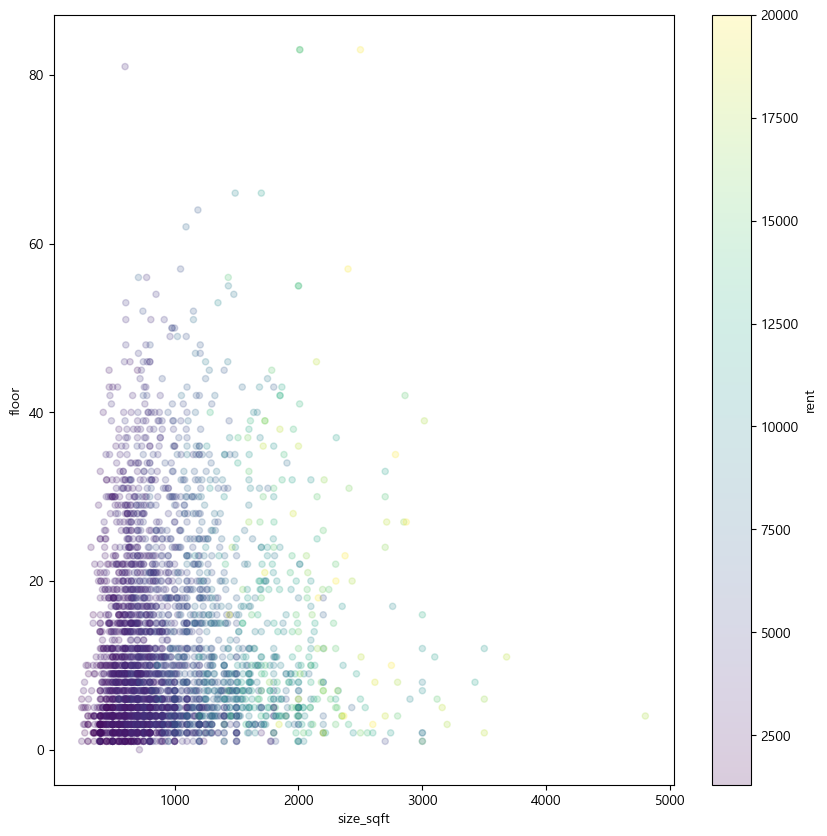

In [534]:
manhattan.plot(kind="scatter", x="size_sqft", y="floor", alpha = .2, c = "rent", cmap = plt.get_cmap("viridis"),
                  figsize=(10, 10))

In [535]:
print(manhattan.keys())

Index(['rental_id', 'rent', 'bedrooms', 'bathrooms', 'size_sqft',
       'min_to_subway', 'floor', 'building_age_yrs', 'no_fee', 'has_roofdeck',
       'has_washer_dryer', 'has_doorman', 'has_elevator', 'has_dishwasher',
       'has_patio', 'has_gym', 'neighborhood', 'borough'],
      dtype='object')


In [536]:
manhattan2 = manhattan.drop(['rental_id', 'neighborhood', 'borough'], axis=1)
manhattan2.head()

,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym
0,2550,0.0,1,480,9,2.0,17,1,1,0,0,1,1,0,1
1,11500,2.0,2,2000,4,1.0,96,0,0,0,0,0,0,0,0
2,4500,1.0,1,916,2,51.0,29,0,1,0,1,1,1,0,0
3,4795,1.0,1,975,3,8.0,31,0,0,0,1,1,1,0,1
4,17500,2.0,2,4800,3,4.0,136,0,0,0,1,1,1,0,1


In [537]:
X = manhattan2.drop('rent', axis=1)
y = manhattan2['rent']

In [538]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42) # test_size 미입력시 0.25가 디폴트

In [539]:
print(X_train.shape, X_test.shape)

(2477, 14) (1062, 14)


In [540]:
pd.DataFrame(X_train).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2477 entries, 944 to 3174
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   bedrooms          2477 non-null   float64
 1   bathrooms         2477 non-null   int64  
 2   size_sqft         2477 non-null   int64  
 3   min_to_subway     2477 non-null   int64  
 4   floor             2477 non-null   float64
 5   building_age_yrs  2477 non-null   int64  
 6   no_fee            2477 non-null   int64  
 7   has_roofdeck      2477 non-null   int64  
 8   has_washer_dryer  2477 non-null   int64  
 9   has_doorman       2477 non-null   int64  
 10  has_elevator      2477 non-null   int64  
 11  has_dishwasher    2477 non-null   int64  
 12  has_patio         2477 non-null   int64  
 13  has_gym           2477 non-null   int64  
dtypes: float64(2), int64(12)
memory usage: 290.3 KB


In [541]:
pd.DataFrame(X_test).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1062 entries, 712 to 1896
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   bedrooms          1062 non-null   float64
 1   bathrooms         1062 non-null   int64  
 2   size_sqft         1062 non-null   int64  
 3   min_to_subway     1062 non-null   int64  
 4   floor             1062 non-null   float64
 5   building_age_yrs  1062 non-null   int64  
 6   no_fee            1062 non-null   int64  
 7   has_roofdeck      1062 non-null   int64  
 8   has_washer_dryer  1062 non-null   int64  
 9   has_doorman       1062 non-null   int64  
 10  has_elevator      1062 non-null   int64  
 11  has_dishwasher    1062 non-null   int64  
 12  has_patio         1062 non-null   int64  
 13  has_gym           1062 non-null   int64  
dtypes: float64(2), int64(12)
memory usage: 124.5 KB


In [542]:
model = LinearRegression()
model.fit(X_train, y_train)
print("훈련 점수 : ", model.score(X_train, y_train))
print("테스트 점수 : ", model.score(X_test, y_test))

훈련 점수 :  0.7895700735340144
테스트 점수 :  0.752778330369223


In [543]:
ridge = Ridge(alpha=1.0).fit(X_train, y_train)
print("훈련 점수 : ", ridge.score(X_train, y_train))
print("테스트 점수 : ", ridge.score(X_test, y_test))

훈련 점수 :  0.7895698522688053
테스트 점수 :  0.75275740986352


In [544]:
lasso = Lasso(alpha=1.0).fit(X_train, y_train)
print("훈련 점수 : ", lasso.score(X_train, y_train))
print("테스트 점수 : ", lasso.score(X_test, y_test))
print("사용한 특성의 수 :", np.sum(lasso.coef_ !=0))

훈련 점수 :  0.7895592501401899
테스트 점수 :  0.7528306269687817
사용한 특성의 수 : 13


In [545]:
scores = cross_val_score(model, X, y, cv=10, scoring="neg_mean_squared_error")

In [546]:
print(scores)
print(scores.mean())

[-2532995.94453738 -2189438.91117944 -1816973.5736769  -2055719.69794718
 -2133768.17929887 -2353582.30542054 -2492709.43511511 -2288090.85826233
 -2369325.13947192 -2157218.65507024]
-2238982.2699979898


In [547]:
r2_scores = cross_val_score(model, X, y, cv=10, scoring="r2")

In [548]:
print(r2_scores)
print(r2_scores.mean())

[0.72570145 0.7827812  0.76601727 0.78124287 0.79705206 0.71578394
 0.80113763 0.78657185 0.76050536 0.80665487]
0.7723448511188529


In [549]:
y_train_predict = model.predict(X_train)

mse = mean_squared_error(y_train, y_train_predict)
# mean_squared_error(정답, 예측값)
# LOSS = COST # 딥러닝에서는 COST라고 자주 사용된다
rmse = np.sqrt(mean_squared_error(y_train, y_train_predict)) # mse에 루트를 씌워준 것
r2 = r2_score(y_train, y_train_predict)

print("MSE :", mse)
print("RMSE :", rmse)
print("R2 :", r2)

MSE : 2127741.0229900726
RMSE : 1458.6778338584818
R2 : 0.7895700735340144


In [550]:
y_test_predict = model.predict(X_test)

mse = mean_squared_error(y_test, y_test_predict)
# mean_squared_error(정답, 예측값)
# LOSS = COST # 딥러닝에서는 COST라고 자주 사용된다
rmse = np.sqrt(mean_squared_error(y_test, y_test_predict)) # mse에 루트를 씌워준 것
r2 = r2_score(y_test, y_test_predict)

print("MSE :", mse)
print("RMSE :", rmse)
print("R2 :", r2)

MSE : 2408147.6828340613
RMSE : 1551.8207637591595
R2 : 0.752778330369223


In [551]:
my_rent = [[1, 1, 620, 16, 1, 98, 1, 0, 1, 0 , 0, 1, 1, 0]]
print("렌트 가격은 {} 입니다.".format(model.predict(my_rent)))

렌트 가격은 [2246.50745704] 입니다.


In [552]:
result = sm.ols(formula="rent ~ bedrooms + bathrooms + size_sqft + min_to_subway + floor + building_age_yrs + no_fee + has_roofdeck + has_washer_dryer + has_doorman + has_elevator + has_dishwasher + has_patio + has_gym", data = manhattan).fit()

In [553]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   rent   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     888.8
Date:                Tue, 09 May 2023   Prob (F-statistic):               0.00
Time:                        18:14:53   Log-Likelihood:                -30869.
No. Observations:                3539   AIC:                         6.177e+04
Df Residuals:                    3524   BIC:                         6.186e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         -422.1606     96.095  

#### 정규화를 해보자

In [554]:
minmax = MinMaxScaler()
minmax.fit(X_train) # fit은 train에만 해주면 test는 자동으로 생성됨

train_scaled = minmax.transform(X_train)
test_scaled = minmax.transform(X_test)

In [556]:
train_scaled

array([[0.4       , 0.2       , 0.08373626, ..., 0.        , 0.        ,
        0.        ],
       [0.4       , 0.2       , 0.13186813, ..., 0.        , 0.        ,
        0.        ],
       [0.4       , 0.2       , 0.12087912, ..., 1.        , 1.        ,
        1.        ],
       ...,
       [0.8       , 0.6       , 0.38461538, ..., 0.        , 0.        ,
        0.        ],
       [0.4       , 0.2       , 0.0989011 , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.2       , 0.05428571, ..., 0.        , 0.        ,
        0.        ]])

In [557]:
test_scaled

array([[0.2       , 0.2       , 0.15318681, ..., 0.        , 0.        ,
        0.        ],
       [0.4       , 0.4       , 0.12725275, ..., 0.        , 0.        ,
        0.        ],
       [0.2       , 0.2       , 0.11054945, ..., 1.        , 0.        ,
        1.        ],
       ...,
       [0.        , 0.2       , 0.09846154, ..., 1.        , 0.        ,
        1.        ],
       [0.2       , 0.2       , 0.08791209, ..., 0.        , 0.        ,
        0.        ],
       [0.2       , 0.2       , 0.10791209, ..., 0.        , 0.        ,
        0.        ]])

In [558]:
pd.DataFrame(train_scaled)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.4,0.2,0.083736,0.069767,0.012048,0.566667,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
1,0.4,0.2,0.131868,0.093023,0.048193,0.294444,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.4,0.2,0.120879,0.046512,0.060241,0.477778,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,0.2,0.2,0.115385,0.093023,0.144578,0.294444,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.2,0.043956,0.302326,0.060241,0.333333,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2472,0.4,0.4,0.268571,0.162791,0.072289,0.066667,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0
2473,0.2,0.2,0.098901,0.023256,0.024096,0.644444,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0
2474,0.8,0.6,0.384615,0.093023,0.036145,0.533333,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2475,0.4,0.2,0.098901,0.162791,0.012048,0.588889,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [559]:
pd.DataFrame(test_scaled)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.2,0.2,0.153187,0.093023,0.024096,0.044444,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.4,0.4,0.127253,0.069767,0.253012,0.083333,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.2,0.2,0.110549,0.116279,0.216867,0.244444,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0
3,0.2,0.4,0.120879,0.209302,0.096386,0.166667,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.2,0.2,0.080879,0.093023,0.373494,0.238889,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1057,0.1,0.2,0.060440,0.186047,0.024096,0.588889,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1058,0.2,0.2,0.087912,0.162791,0.180723,0.588889,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1059,0.0,0.2,0.098462,0.046512,0.108434,0.044444,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0
1060,0.2,0.2,0.087912,0.279070,0.337349,0.200000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [560]:
model = LinearRegression()
model.fit(train_scaled, y_train)

LinearRegression()

In [561]:
model.score(train_scaled, y_train)

0.7895700735340144

In [562]:
model.score(test_scaled, y_test)

0.7527783303692217

In [563]:
##### 오차를 이용한 성능 평가
pred = model.predict(test_scaled)
mse = mean_squared_error(y_test, pred)
np.sqrt(mse)

1551.8207637591634

In [564]:
my_rent = [[1, 1, 620, 16, 1, 98, 1, 0, 1, 0 , 0, 1, 1, 0]]
mydata = np.array([[1, 1, 620, 16, 1, 98, 1, 0, 1, 0 , 0, 1, 1, 0]])
minmax = MinMaxScaler()
scaled_data = minmax.fit_transform(mydata)

predicted_price = model.predict(scaled_data)
print("주택 가격은 {} 입니다.".format(predicted_price[0]))

# predicted_price[0], predicted_price 두 코드 조각의 주요 차이점은 출력되는 형식에 있습니다.
# predicted_price[0]이 format 메서드에 전달되어, predicted_price 배열의 첫 번째 요소 (스칼라 값)만 출력됩니다.
# 전체 predicted_price 배열이 format 메서드에 전달되어, 전체 배열이 대괄호로 묶인 값들의 목록으로 출력됩니다 (즉, 벡터).
# 첫 번째 코드 조각은 하나의 예측 값 (예: 하나의 집 가격을 예측하는 경우)을 출력할 때 보통 더 많이 사용되고
# 두 번째 코드 조각은 여러 개의 집 가격을 예측하는 경우와 같이 예측 값의 벡터를 출력할 때 보통 더 많이 사용됩니다.

주택 가격은 780.8478927073975 입니다.


# 5. 중고 자동차 가격 예측 모델

## (1) Data Definition

In [104]:
data = pd.read_csv("data/handed_car.csv")
data.head()

,CAR_ID,year,distance,sunroof,navigation,grade,fuel,transmission,price
0,104,2012,117020,0,0,luxury,gasoline,4-auto,470
1,122,2015,63317,0,0,deluxe,gasoline,4-auto,570
2,122,2013,88000,0,0,smart_special,gasoline,4-auto,380
3,142,2012,106822,1,0,luxury,gasoline,4-auto,570
4,149,2014,34913,0,0,smart,gasoline,4-auto,330


## (2) Data Examine

In [108]:
data.info()
# 1~4 : 연속형 : 정규화
# 5~7 : 범주형 : 원핫인코딩
# 따로 떼어내서 각자 전처리하고 다시 합쳐질 예정

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2864 entries, 0 to 2863
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CAR_ID        2864 non-null   int64 
 1   year          2864 non-null   int64 
 2   distance      2864 non-null   int64 
 3   sunroof       2864 non-null   int64 
 4   navigation    2864 non-null   int64 
 5   grade         2864 non-null   object
 6   fuel          2864 non-null   object
 7   transmission  2864 non-null   object
 8   price         2864 non-null   int64 
dtypes: int64(6), object(3)
memory usage: 201.5+ KB


In [109]:
data.describe()

,CAR_ID,year,distance,sunroof,navigation,price
count,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000
mean,5582.808310,2013.107193,67234.147346,0.114874,0.130587,560.319483
std,2713.953471,1.194950,35350.733324,0.318926,0.337007,125.724172
min,104.000000,2012.000000,2915.000000,0.000000,0.000000,99.000000
25%,3199.250000,2012.000000,41329.250000,0.000000,0.000000,480.000000
50%,5821.000000,2013.000000,61242.500000,0.000000,0.000000,570.000000
75%,7898.250000,2014.000000,87270.000000,0.000000,0.000000,650.000000
max,9998.000000,2016.000000,247119.000000,1.000000,1.000000,1130.000000


array([[<AxesSubplot:title={'center':'CAR_ID'}>,
        <AxesSubplot:title={'center':'year'}>],
       [<AxesSubplot:title={'center':'distance'}>,
        <AxesSubplot:title={'center':'sunroof'}>],
       [<AxesSubplot:title={'center':'navigation'}>,
        <AxesSubplot:title={'center':'price'}>]], dtype=object)

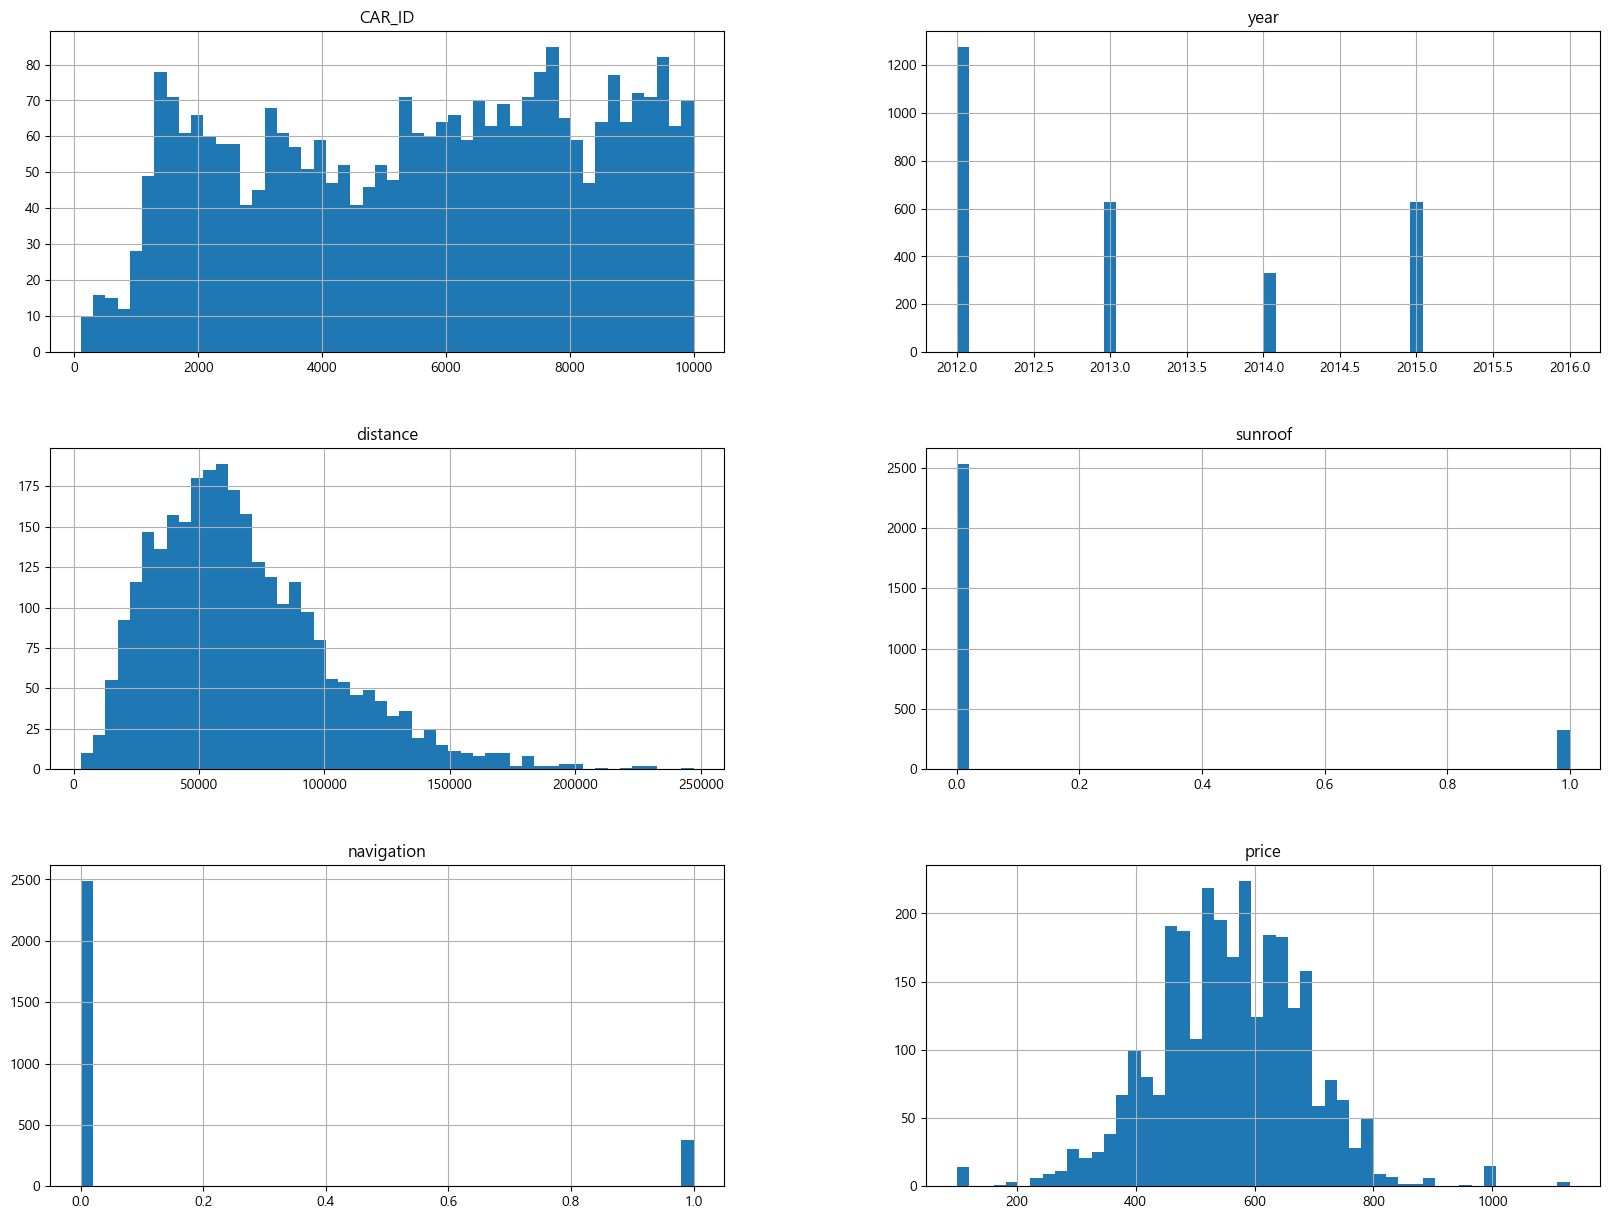

In [111]:
data.hist(bins=50, figsize = (20, 15))

## (3) Preprocessing

### 1) 특성(X)과 레이블(y)로 나누기
- 특성(X) = 요소
- 레이블(y) = 우리가 구하고자 하는 것

In [118]:
X = data[data.columns[1:-1]] # 앞에서 CAR_ID빼고, 뒤에서 price빼고
X.head()

,year,distance,sunroof,navigation,grade,fuel,transmission
0,2012,117020,0,0,luxury,gasoline,4-auto
1,2015,63317,0,0,deluxe,gasoline,4-auto
2,2013,88000,0,0,smart_special,gasoline,4-auto
3,2012,106822,1,0,luxury,gasoline,4-auto
4,2014,34913,0,0,smart,gasoline,4-auto


In [114]:
y = data[[data.columns[-1]]]
y.head()

,price
0,470
1,570
2,380
3,570
4,330


### 2) 훈련 데이터와 테스트 데이터 나누기

In [207]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state = 0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state = 42)

print(X_train.shape, X_test.shape)

(2004, 7) (860, 7)


### 3) 연속형 변수와 범주형 변수를 나누어 처리한 후 다시 통합

- 훈련 데이터 나누기

In [208]:
train_num = X_train[X_train.columns[0:4]] # 연속형 변수(숫자)
train_num.head()

,year,distance,sunroof,navigation
1613,2012,122976,0,0
2771,2014,10634,0,0
1032,2012,36541,0,0
2805,2013,70197,1,1
2701,2012,72492,0,0


In [209]:
train_cat = X_train[X_train.columns[4:]] # 범주형 변수(문자)
train_cat.head()

,grade,fuel,transmission
1613,deluxe,gasoline,4-auto
2771,luxury,gasoline,4-auto
1032,special,gasoline,4-auto
2805,special,gasoline,4-auto
2701,luxury,gasoline,4-auto


- 훈련용 데이터  원 핫 인코딩

In [210]:
train_cat["grade"].value_counts()

luxury           727
special          510
deluxe           274
trendy           220
smart            155
advanced          54
smart_special     53
basic             11
Name: grade, dtype: int64

In [211]:
train_cat = pd.get_dummies(train_cat)
train_cat.head()

,grade_advanced,grade_basic,grade_deluxe,grade_luxury,grade_smart,grade_smart_special,grade_special,grade_trendy,fuel_LPG,fuel_gasoline,fuel_hybrid,transmission_4-auto,transmission_5-manual,transmission_CVT
1613,0,0,1,0,0,0,0,0,0,1,0,1,0,0
2771,0,0,0,1,0,0,0,0,0,1,0,1,0,0
1032,0,0,0,0,0,0,1,0,0,1,0,1,0,0
2805,0,0,0,0,0,0,1,0,0,1,0,1,0,0
2701,0,0,0,1,0,0,0,0,0,1,0,1,0,0


In [212]:
# 합칠 때 문제가 되는 경우가 많기 때문에 이상하게 배치된 인덱스를 지워주자
train_cat = train_cat.reset_index(drop=True)
train_cat

,grade_advanced,grade_basic,grade_deluxe,grade_luxury,grade_smart,grade_smart_special,grade_special,grade_trendy,fuel_LPG,fuel_gasoline,fuel_hybrid,transmission_4-auto,transmission_5-manual,transmission_CVT
0,0,0,1,0,0,0,0,0,0,1,0,1,0,0
1,0,0,0,1,0,0,0,0,0,1,0,1,0,0
2,0,0,0,0,0,0,1,0,0,1,0,1,0,0
3,0,0,0,0,0,0,1,0,0,1,0,1,0,0
4,0,0,0,1,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1999,0,0,0,1,0,0,0,0,0,1,0,1,0,0
2000,0,0,0,0,0,1,0,0,0,1,0,1,0,0
2001,0,0,0,0,0,0,1,0,0,1,0,1,0,0
2002,0,0,0,0,1,0,0,0,0,1,0,1,0,0


In [213]:
train_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2004 entries, 0 to 2003
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   grade_advanced         2004 non-null   uint8
 1   grade_basic            2004 non-null   uint8
 2   grade_deluxe           2004 non-null   uint8
 3   grade_luxury           2004 non-null   uint8
 4   grade_smart            2004 non-null   uint8
 5   grade_smart_special    2004 non-null   uint8
 6   grade_special          2004 non-null   uint8
 7   grade_trendy           2004 non-null   uint8
 8   fuel_LPG               2004 non-null   uint8
 9   fuel_gasoline          2004 non-null   uint8
 10  fuel_hybrid            2004 non-null   uint8
 11  transmission_4-auto    2004 non-null   uint8
 12  transmission_5-manual  2004 non-null   uint8
 13  transmission_CVT       2004 non-null   uint8
dtypes: uint8(14)
memory usage: 27.5 KB


- 테스트 데이터 나누기

In [214]:
test_num = X_test[X_test.columns[0:4]] # 연속형 변수(숫자)
test_num.head()

,year,distance,sunroof,navigation
1590,2012,90000,0,0
1752,2013,40280,1,0
772,2012,67407,0,0
1735,2015,21128,0,0
387,2013,69017,0,0


In [215]:
test_cat = X_test[X_test.columns[4:]] # 범주형 변수(문자)
test_cat.head()

,grade,fuel,transmission
1590,smart,gasoline,5-manual
1752,luxury,gasoline,4-auto
772,deluxe,gasoline,4-auto
1735,luxury,gasoline,4-auto
387,special,gasoline,4-auto


- 테스트 데이터 원 핫 인코딩

In [216]:
test_cat = pd.get_dummies(test_cat)
test_cat.head()

,grade_advanced,grade_basic,grade_deluxe,grade_luxury,grade_smart,grade_smart_special,grade_special,grade_trendy,fuel_LPG,fuel_gasoline,fuel_hybrid,transmission_4-auto,transmission_5-manual,transmission_CVT
1590,0,0,0,0,1,0,0,0,0,1,0,0,1,0
1752,0,0,0,1,0,0,0,0,0,1,0,1,0,0
772,0,0,1,0,0,0,0,0,0,1,0,1,0,0
1735,0,0,0,1,0,0,0,0,0,1,0,1,0,0
387,0,0,0,0,0,0,1,0,0,1,0,1,0,0


In [217]:
# 합칠 때 문제가 되는 경우가 많기 때문에 이상하게 배치된 인덱스를 지워주자
test_cat = test_cat.reset_index(drop=True)
test_cat

,grade_advanced,grade_basic,grade_deluxe,grade_luxury,grade_smart,grade_smart_special,grade_special,grade_trendy,fuel_LPG,fuel_gasoline,fuel_hybrid,transmission_4-auto,transmission_5-manual,transmission_CVT
0,0,0,0,0,1,0,0,0,0,1,0,0,1,0
1,0,0,0,1,0,0,0,0,0,1,0,1,0,0
2,0,0,1,0,0,0,0,0,0,1,0,1,0,0
3,0,0,0,1,0,0,0,0,0,1,0,1,0,0
4,0,0,0,0,0,0,1,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
855,0,0,0,1,0,0,0,0,0,1,0,1,0,0
856,0,0,0,1,0,0,0,0,0,1,0,1,0,0
857,0,0,0,1,0,0,0,0,0,1,0,1,0,0
858,0,0,0,1,0,0,0,0,0,1,0,1,0,0


In [218]:
test_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 860 entries, 0 to 859
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   grade_advanced         860 non-null    uint8
 1   grade_basic            860 non-null    uint8
 2   grade_deluxe           860 non-null    uint8
 3   grade_luxury           860 non-null    uint8
 4   grade_smart            860 non-null    uint8
 5   grade_smart_special    860 non-null    uint8
 6   grade_special          860 non-null    uint8
 7   grade_trendy           860 non-null    uint8
 8   fuel_LPG               860 non-null    uint8
 9   fuel_gasoline          860 non-null    uint8
 10  fuel_hybrid            860 non-null    uint8
 11  transmission_4-auto    860 non-null    uint8
 12  transmission_5-manual  860 non-null    uint8
 13  transmission_CVT       860 non-null    uint8
dtypes: uint8(14)
memory usage: 11.9 KB


#### 훈련용 데이터와 테스트 데이터를 나눈 후 갯수가 다를 경우 처리법

- 변수의 갯수가 다를 경우 : align()
- 데이터가 많으면 처음부터 다시 내려오는 것이 거의 불가능할 수도 있음(시간관계상)

In [152]:
train_cat1, test_cat1 = train_cat.align(test_cat, join="outer", axis=1)

In [153]:
train_cat1.info()
test_cat1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2004 entries, 2069 to 2732
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   grade_advanced         2004 non-null   uint8
 1   grade_basic            2004 non-null   uint8
 2   grade_deluxe           2004 non-null   uint8
 3   grade_luxury           2004 non-null   uint8
 4   grade_smart            2004 non-null   uint8
 5   grade_smart_special    2004 non-null   uint8
 6   grade_special          2004 non-null   uint8
 7   grade_trendy           2004 non-null   uint8
 8   fuel_LPG               2004 non-null   uint8
 9   fuel_gasoline          2004 non-null   uint8
 10  fuel_hybrid            2004 non-null   uint8
 11  transmission_4-auto    2004 non-null   uint8
 12  transmission_5-manual  2004 non-null   uint8
 13  transmission_CVT       2004 non-null   uint8
dtypes: uint8(14)
memory usage: 43.1 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 

#### 정규화

- MinMaxScaler()

In [219]:
minmax = MinMaxScaler()
minmax.fit(train_num) # fit은 train에만 해주면 test는 자동으로 생성됨

train_scaled = minmax.transform(train_num)
test_scaled = minmax.transform(test_num)

In [220]:
train_scaled

array([[0.        , 0.49164223, 0.        , 0.        ],
       [0.66666667, 0.03160882, 0.        , 0.        ],
       [0.        , 0.13769635, 0.        , 0.        ],
       ...,
       [0.        , 0.41803165, 1.        , 0.        ],
       [0.33333333, 0.49677728, 0.        , 0.        ],
       [0.33333333, 0.17550081, 0.        , 0.        ]])

In [221]:
test_scaled

array([[0.        , 0.35660759, 0.        , 0.        ],
       [0.33333333, 0.15300732, 1.        , 0.        ],
       [0.        , 0.26409068, 0.        , 0.        ],
       ...,
       [0.33333333, 0.24894351, 1.        , 1.        ],
       [1.        , 0.28045405, 1.        , 1.        ],
       [0.66666667, 0.27472113, 0.        , 1.        ]])

In [222]:
train_final = pd.concat([pd.DataFrame(train_scaled), train_cat], axis=1, ignore_index=True)

In [223]:
test_final = pd.concat([pd.DataFrame(test_scaled), test_cat], axis=1, ignore_index=True)

## (4) 선형 회귀 학습

In [224]:
model = LinearRegression()
model.fit(train_final, y_train)

LinearRegression()

In [225]:
model.score(train_final, y_train)

0.6160252283256753

In [226]:
model.score(test_final, y_test)

0.6350232660851427

In [227]:
##### 오차를 이용한 성능 평가
pred = model.predict(test_final)
mse = mean_squared_error(y_test, pred)
np.sqrt(mse)

76.38394955892208